# Introducción

Los indicadores económicos son como faros que ayudan a las autoridades económicas a conducir la economía de un país por las sendas que le permitan alcanzar los objetivos deseados.
Dentro de la Contabilidad Nacional existe una macrovariable de uso muy frecuente: el Producto Interior Bruto (PIB). El PIB es la suma del valor de todos los bienes y servicios finales producidos en el país en un año. 
Poder predecir el comportamiento del PIB en el futuro al analizar y procesar la información histórica puede ser de gran utilidad para observar a que escenario se puede enfrentar un país.

# Resultados

Se repasan varios modelos de regresión y se observan los resultados que se obtienen con predicciones y la precisión de la predicción

In [1]:
import pandas as pd
df=pd.read_csv('PIB.csv', sep = ';')

In [2]:
df.head()

Year  Country        PIB
0  1960  Ecuador   9.547575
1  1961  Ecuador   8.957493
2  1962  Ecuador  10.241499
3  1963  Ecuador   9.233322
4  1964  Ecuador   8.900054

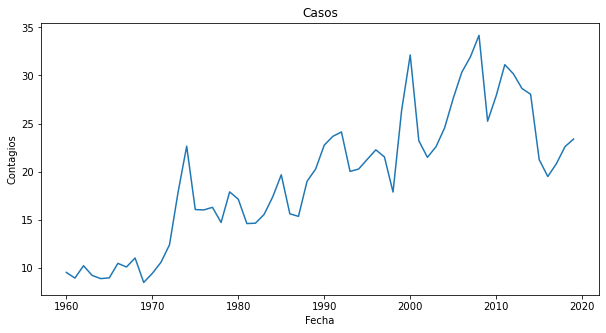

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  

plt.figure(figsize = (10,5))
x = df['Year'].values.reshape(-1,1)
y = df['PIB'].values.reshape(-1,1)
plt.plot(x, y,'-', markersize = 5, label ='')
plt.title('Casos')  
plt.xlabel('Fecha')  
plt.ylabel('Contagios') 

plt.show()

In [4]:
x = df['Year'].values.reshape(-1,1)
y = df['PIB'].values.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

## Regresion Lineal

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
b=regressor.intercept_
m=regressor.coef_

In [7]:
#Regresion Lineal
y_pred = regressor.predict(X_test)  
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) 
df1

Actual  Predicted
0    9.547575   9.635467
1    8.979657  11.254057
2   22.273285  21.289316
3   27.618174  24.202778
4   17.878038  13.843801
5   28.051854  27.116241
6   20.035841  20.318162
7   34.163640  25.173932
8   12.407912  13.520083
9   20.832818  28.087395
10  30.333075  24.526496
11  27.894956  25.821369

In [8]:
from sklearn.metrics import r2_score
preLin=r2_score(y_test,y_pred)
print("Precisión del modelo: ", preLin)

Precisión del modelo:  0.7258986931351878


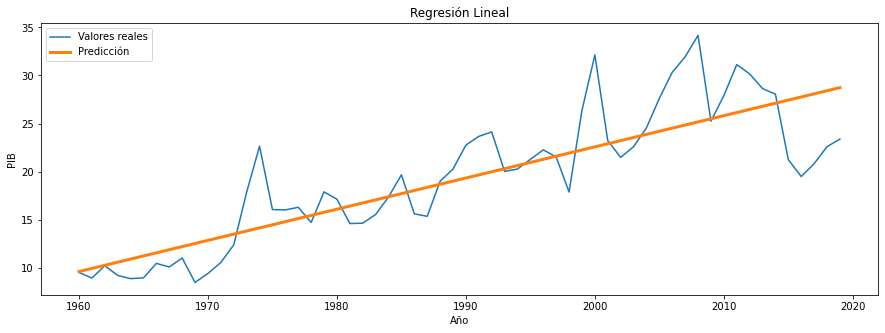

In [25]:
plt.figure(figsize = (15,5))

x = df['Year'].values.reshape(-1,1)
y = df['PIB'].values.reshape(-1,1)

plt.plot(x, y,'-', label ='Valores reales')
plt.plot(x, m*x + b, '-', label = 'Predicción', linewidth = 3)

plt.title('Regresión Lineal') 
plt.xlabel('Año')
plt.ylabel('PIB')
plt.legend(loc="upper left") 

plt.show()

# Regresion polinomial

In [16]:
X = df['Year'].values.reshape(-1,1)
y = df['PIB'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [18]:
y_pred2 = pol_reg.predict(poly_reg.fit_transform(X_test)) 
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()}) 
df2

Actual  Predicted
0   15.629403  19.100076
1   21.286903  23.472800
2   23.390040  23.452748
3   19.005851  20.141587
4   10.580406  11.910572
5   10.241499   9.839144
6   20.279818  23.041801
7   22.604684  24.027164
8   32.127535  25.290436
9   14.656491  16.994317
10   8.900054  10.060905
11   9.441228  11.558534

In [19]:
prePoly=r2_score(y_test,y_pred2)
print("Precisión del modelo: ", prePoly)

Precisión del modelo:  0.8404149940057097


In [26]:
plt.figure(figsize = (15,5))
def polymonial():
    plt.plot(x, y,'-', label ='Valores reales')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)),  '-', label = 'Predicción', linewidth = 3)
    plt.title('Regresión Polinomial')
    plt.xlabel('Año')
    plt.ylabel('PIB')
    plt.legend(loc="upper left")
    plt.show()
    return

polymonial()

## Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

modeloRF = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRF.fit(X_train, y_train.ravel())

y_pred3 = modeloRF.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred3.flatten()}) 
df3

Actual  Predicted
0   15.629403  18.175644
1   21.286903  21.378307
2   23.390040  21.464459
3   19.005851  18.320833
4   10.580406  13.041829
5   10.241499   9.014875
6   20.279818  20.669375
7   22.604684  21.464459
8   32.127535  26.062062
9   14.656491  15.059218
10   8.900054   9.131856
11   9.441228   9.932980

In [28]:
preRF=r2_score(y_test,y_pred3)
print("Precisión del modelo: ", preRF)

Precisión del modelo:  0.8964537284282987


In [29]:
plt.figure(figsize = (15,5))
def polymonial():
    plt.plot(x, y,'-', label ='Valores reales')
    plt.plot(X, modeloRF.predict(X),  '-', label = 'Predicción', linewidth = 3)
    plt.title('Regresión Polinomial')
    plt.xlabel('Año')
    plt.ylabel('PIB')
    plt.legend(loc="upper left")
    plt.show()
    return

polymonial()

## Gasto y el Covid-19 en el Ecuador

En el año 2020 según el Banco Central del Ecuador el Producto Interno Bruto (PIB) decreció en 12,4% con respecto al mismo período de 2019. 
Debido a la situación actual y a la suspensión de las actividades productivas en el país, el PIB en el 2020 se totalizó en USD 15.790 millones.

En el país en el año 2019, el presupuesto asignado para el gasto en salud fue del 4.36% del PIB, y cuando todo apuntaba a que en el año 2020 el gasto sería mayor la realidad fue diferente, pues el pago de deuda externa quitó recursos para atender la emergencia sanitaria. Reportando un gasto en salud del 3.5% del PIB.

## Opinión

In [30]:
df4 = pd.DataFrame({'R. Lineal': preLin.flatten(), 'R. Polinomial': prePoly.flatten(), 'Random Forest': preRF.flatten()}) 
df4

R. Lineal  R. Polinomial  Random Forest
0   0.725899       0.840415       0.896454

De acuerdo con cada uno de los modelos y su precisión para la predicción, se puede determinar que el modelo de regresión a emplear sería Random Forest Regression además que se encuentra avalado con la gráfica en cuanto los valores predecidos se acercan a los reales, a diferencia de los otros modelos.

## Conclusiones

Para cada uno de los casos se deben explorar el modelo de regresión que mejor se ajuste.

Los datos deben provenir de fuentes reales para estudiar y predecir el comportamiento como realmente se espera

## Bibliografía

Random Forest Regressor. (s. f.). Kite. Recuperado 26 de abril de 2021, de https://www.kite.com/python/docs/sklearn.ensemble.RandomForestRegressor

Malik, U. (s. f.). Random Forest Algorithm with Python and Scikit-Learn. Stack Abuse. Recuperado 26 de abril de 2021, de https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

Exportaciones de bienes y servicios (% del PIB) - Ecuador | Data. (s. f.). Banco Mundial. Recuperado 26 de abril de 2021, de https://datos.bancomundial.org/indicador/NE.EXP.GNFS.ZS?locations=EC&view=chart